In [42]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
## load data
training = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0Q8REN/UNSW_NB15_training-set.csv")
testing = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0Q8REN/UNSW_NB15_testing-set.csv")
print("training ",training.shape)
print("testing ",testing.shape)

training  (82332, 45)
testing  (175341, 45)


In [44]:
# cek kolom training dan testing mempunyai kesamaan
all(training.columns == testing.columns)

True

In [45]:
# Membuat dataframe baru dengan menggabungkan data training dan testing serta membuang kolom 'id'
df = pd.concat([training,testing]).drop('id',axis=1)
df = df.reset_index(drop=True)

# Menampilkan 10 data teratas
df.head(10)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.09020,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.00030,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.00510,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.66080,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.00250,254,...,1,3,0,0,0,2,3,0,Normal,0
5,0.000003,udp,-,INT,2,0,784,0,333333.32150,254,...,1,2,0,0,0,2,2,0,Normal,0
6,0.000006,udp,-,INT,2,0,1960,0,166666.66080,254,...,1,2,0,0,0,2,2,0,Normal,0
7,0.000028,udp,-,INT,2,0,1384,0,35714.28522,254,...,1,3,0,0,0,1,3,0,Normal,0
8,0.000000,arp,-,INT,1,0,46,0,0.00000,0,...,2,2,0,0,0,2,2,1,Normal,0
9,0.000000,arp,-,INT,1,0,46,0,0.00000,0,...,2,2,0,0,0,2,2,1,Normal,0


Dataset ini mencakup 43 variabel yang berhubungan dengan monitoring network dan 2 variabel yang mendefinisikan apakah serangan terjadi (label) dan jenis serangan (attack_cat).

Mari kita lihat sekilas tentang jenis-jenis serangan.

In [46]:
# cek unique value di kolom attack_cat
df.attack_cat.unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [47]:
df.proto.unique()

array(['udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp', 'ip',
       'ipnip', 'st2', 'argus', 'chaos', 'egp', 'emcon', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2',
       'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'netblt', 'mfe-nsp',
       'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6',
       'sdrp', 'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd',
       'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any', 'ipv6-opts',
       'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn',
       'pvp', 'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'vines',
       'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp',
       'ax.25', 'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp',
       'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp', 'bna',
       'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep',
       'secure-vmtp', 'xtp', 'il', 'rsvp', 'unas', 'fc', 'iso-ip',


In [48]:
df.state.unique()

array(['INT', 'FIN', 'REQ', 'ACC', 'CON', 'RST', 'CLO', 'ECO', 'PAR',
       'URN', 'no'], dtype=object)

*INT* = Internaticonal

In [49]:
df.service.unique()

array(['-', 'http', 'ftp', 'ftp-data', 'smtp', 'pop3', 'dns', 'snmp',
       'ssl', 'dhcp', 'irc', 'radius', 'ssh'], dtype=object)

In [50]:
print(df['service'])

0           -
1           -
2           -
3           -
4           -
         ... 
257668    dns
257669      -
257670    dns
257671    dns
257672    dns
Name: service, Length: 257673, dtype: object


In [51]:
# cek unique value di kolom label
df.label.unique()

array([0, 1], dtype=int64)

In [52]:
df.duplicated().sum()

94928

In [53]:
df.drop_duplicates(inplace=True)

In [54]:
df.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label      

In [55]:
# cek tipe data dalam dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162745 entries, 0 to 257669
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                162745 non-null  float64
 1   proto              162745 non-null  object 
 2   service            162745 non-null  object 
 3   state              162745 non-null  object 
 4   spkts              162745 non-null  int64  
 5   dpkts              162745 non-null  int64  
 6   sbytes             162745 non-null  int64  
 7   dbytes             162745 non-null  int64  
 8   rate               162745 non-null  float64
 9   sttl               162745 non-null  int64  
 10  dttl               162745 non-null  int64  
 11  sload              162745 non-null  float64
 12  dload              162745 non-null  float64
 13  sloss              162745 non-null  int64  
 14  dloss              162745 non-null  int64  
 15  sinpkt             162745 non-null  float64
 16  di

In [56]:
df.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,162745.000000,162745.000000,162745.000000,1.627450e+05,1.627450e+05,1.627450e+05,162745.000000,162745.00000,1.627450e+05,1.627450e+05,...,162745.000000,162745.000000,162745.000000,162745.000000,162745.000000,162745.000000,162745.000000,162745.000000,162745.000000,162745.000000
mean,1.252714,28.609475,28.511579,1.291327e+04,2.229745e+04,3.880025e+04,146.598611,125.76245,4.864382e+07,1.038744e+06,...,2.055854,1.465870,3.964398,0.014698,0.014729,0.173922,3.896998,5.045476,0.003988,0.473274
std,5.093951,168.900118,137.871311,2.169121e+05,1.807485e+05,1.159475e+05,107.455744,116.70385,2.059415e+08,2.968526e+06,...,3.544085,2.221034,6.312773,0.122115,0.122388,0.572048,4.953769,6.451811,0.063023,0.499287
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.001723,4.000000,2.000000,5.100000e+02,1.780000e+02,2.557576e+01,31.000000,29.00000,9.029087e+03,1.919402e+03,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,0.328957,10.000000,8.000000,9.220000e+02,3.540000e+02,8.185405e+01,62.000000,29.00000,6.873062e+04,6.931899e+03,...,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000
75%,0.956087,20.000000,18.000000,2.456000e+03,2.478000e+03,4.002287e+03,254.000000,252.00000,1.129970e+06,4.121056e+05,...,2.000000,1.000000,4.000000,0.000000,0.000000,0.000000,4.000000,6.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.00000,5.988000e+09,2.242273e+07,...,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


karena ada beberapa kolom didata kita yang berupa string, maka kita akan mengubahnya ke kategorikal

In [57]:
# beberapa kolom harus diubah dari string menjadi kategoriacal
for col in ['proto', 'service', 'state']:
    df[col] = df[col].astype('category').cat.codes
    df[col] = df[col].astype('category').cat.codes

df['attack_cat'] = df['attack_cat'].astype('category') # simpan info nomikal untuk info serangan

In [58]:
# eksplorasi perbedaan tipe serangan
print(df[df['label']==1]
     ['attack_cat']
     .value_counts()
)

Exploits          27434
Fuzzers           20960
Reconnaissance     9991
Generic            7599
DoS                5500
Analysis           2032
Backdoor           1880
Shellcode          1456
Worms               171
Normal                0
Name: attack_cat, dtype: int64


<AxesSubplot:ylabel='attack_cat'>

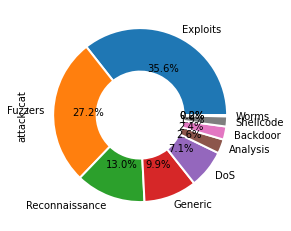

In [59]:
# plot the pie plot of attacks
df[df['label']==1]['attack_cat'].value_counts()\
    .plot\
    .pie(autopct='%1.1f%%',wedgeprops={'linewidth': 2, 'edgecolor': 'white', 'width': 0.50})

In [60]:
# Melakukan one-hot encoding
df = pd.get_dummies(df, columns=['proto', 'service', 'state', 'attack_cat'])

print(df)

             dur  spkts  dpkts  sbytes  dbytes           rate  sttl  dttl  \
0       0.000011      2      0     496       0   90909.090200   254     0   
1       0.000008      2      0    1762       0  125000.000300   254     0   
2       0.000005      2      0    1068       0  200000.005100   254     0   
3       0.000006      2      0     900       0  166666.660800   254     0   
4       0.000010      2      0    2126       0  100000.002500   254     0   
...          ...    ...    ...     ...     ...            ...   ...   ...   
257599  1.914309     74     30   69997    2132      53.805315    62   252   
257609  3.719110     66    340    3086  426483     108.897021    62   252   
257631  0.996503     20     30     942   16684      49.171955    62   252   
257637  1.557125     28     22   12601    1954      31.468251    62   252   
257669  0.505762     10      8     620     354      33.612649   254   252   

               sload          dload  ...  attack_cat_Analysis  \
0       1.

In [61]:
# Membuat peringkat korelasi
correlation_matrix = df.corr(method='pearson')
df_correlation = correlation_matrix['label'].abs().sort_values(ascending=False)

print(df_correlation.head(20))

attack_cat_Normal            1.000000
label                        1.000000
sttl                         0.525025
attack_cat_Exploits          0.475022
attack_cat_Fuzzers           0.405617
ct_state_ttl                 0.395124
dttl                         0.369919
state_5                      0.319034
dload                        0.318790
state_2                      0.315444
attack_cat_Reconnaissance    0.269801
attack_cat_Generic           0.233477
ct_dst_sport_ltm             0.204260
ackdat                       0.203185
rate                         0.199319
attack_cat_DoS               0.197301
dmean                        0.182432
tcprtt                       0.174355
service_5                    0.161542
proto_120                    0.153777
Name: label, dtype: float64


In [62]:
# Membuat peringkat korelasi
correlation_matrix = df.corr(method='pearson')
df_correlation = correlation_matrix['label'].abs().sort_values(ascending=False)

# Memilih variabel dengan nilai korelasi lebih dari 0.3
selected_variables = df_correlation[df_correlation > 0.3].index.tolist()

# Membuat DataFrame baru dengan variabel yang dipilih
df1 = df[selected_variables]

# Menampilkan DataFrame baru
print(df1)

        attack_cat_Normal  label  sttl  attack_cat_Exploits  \
0                       1      0   254                    0   
1                       1      0   254                    0   
2                       1      0   254                    0   
3                       1      0   254                    0   
4                       1      0   254                    0   
...                   ...    ...   ...                  ...   
257599                  0      1    62                    1   
257609                  0      1    62                    1   
257631                  0      1    62                    1   
257637                  0      1    62                    1   
257669                  0      1   254                    0   

        attack_cat_Fuzzers  ct_state_ttl  dttl  state_5          dload  \
0                        0             2     0        1       0.000000   
1                        0             2     0        1       0.000000   
2                    

In [63]:
df1.isnull().sum()

attack_cat_Normal      0
label                  0
sttl                   0
attack_cat_Exploits    0
attack_cat_Fuzzers     0
ct_state_ttl           0
dttl                   0
state_5                0
dload                  0
state_2                0
dtype: int64

In [64]:
# Menghapus nilai yang hilang dari DataFrame asli
df1.dropna(inplace=True)

# Tampilkan DataFrame setelah menghapus nilai yang hilang
print(df1)

        attack_cat_Normal  label  sttl  attack_cat_Exploits  \
0                       1      0   254                    0   
1                       1      0   254                    0   
2                       1      0   254                    0   
3                       1      0   254                    0   
4                       1      0   254                    0   
...                   ...    ...   ...                  ...   
257599                  0      1    62                    1   
257609                  0      1    62                    1   
257631                  0      1    62                    1   
257637                  0      1    62                    1   
257669                  0      1   254                    0   

        attack_cat_Fuzzers  ct_state_ttl  dttl  state_5          dload  \
0                        0             2     0        1       0.000000   
1                        0             2     0        1       0.000000   
2                    

<ipython-input-64-211fedc49aa6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [65]:
df1.duplicated().sum()

45770

In [66]:
# Menghapus data duplikat dengan parameter inplace
df1.drop_duplicates(inplace=True)

<ipython-input-66-d6daa793f523>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)


In [67]:
df1.duplicated().sum()

0

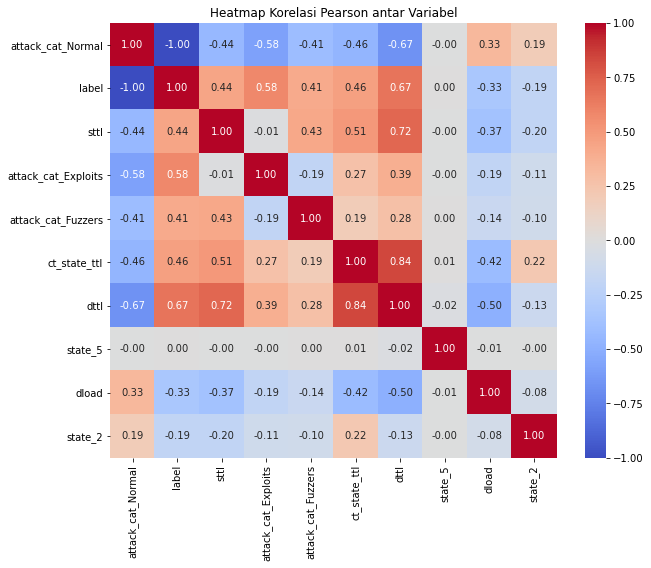

In [68]:
# Hitung matriks korelasi dengan metode Pearson
correlation_matrix = df1.corr(method='pearson')

# Buat heatmap untuk memvisualisasikan korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Pearson antar Variabel")
plt.show()

In [69]:
df1.dtypes

attack_cat_Normal        uint8
label                    int64
sttl                     int64
attack_cat_Exploits      uint8
attack_cat_Fuzzers       uint8
ct_state_ttl             int64
dttl                     int64
state_5                  uint8
dload                  float64
state_2                  uint8
dtype: object

In [70]:
from sklearn.preprocessing import StandardScaler

# Definisi fitur yang dipilih
selected_features = ['attack_cat_Normal', 'sttl', 'attack_cat_Exploits', 'attack_cat_Fuzzers', 'ct_state_ttl', 'dttl', 'state_5', 'dload', 'state_2']

# Pilih hanya fitur yang diinginkan dari DataFrame
data_selected = df1[selected_features]

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the selected features
data_standardized = scaler.fit_transform(data_selected)

# Buat DataFrame baru dengan nilai yang telah distandarisasi
data_standardized_df = pd.DataFrame(data_standardized, columns=selected_features)

# Ganti nilai asli dengan nilai yang telah distandarisasi
df1[selected_features] = data_standardized_df

# Tampilkan DataFrame yang sudah dimodifikasi
print(df1)

        attack_cat_Normal  label      sttl  attack_cat_Exploits  \
0                0.900001      0  1.150919            -0.523279   
8                0.900001      0 -0.672178            -0.523279   
29               0.900001      0  1.150919            -0.523279   
31               0.900001      0  1.150919            -0.523279   
32               0.900001      0  1.150919            -0.523279   
...                   ...    ...       ...                  ...   
257599                NaN      1       NaN                  NaN   
257609                NaN      1       NaN                  NaN   
257631                NaN      1       NaN                  NaN   
257637                NaN      1       NaN                  NaN   
257669                NaN      1       NaN                  NaN   

        attack_cat_Fuzzers  ct_state_ttl      dttl    state_5     dload  \
0                -0.372094      2.129135 -1.587794  74.627328 -0.388858   
8                -0.372094      0.505893  0.7

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [71]:
df1.isnull().sum()

attack_cat_Normal      51066
label                      0
sttl                   51066
attack_cat_Exploits    51066
attack_cat_Fuzzers     51066
ct_state_ttl           51066
dttl                   51066
state_5                51066
dload                  51066
state_2                51066
dtype: int64

In [72]:
# Menghapus nilai yang hilang dari DataFrame asli
df1.dropna(inplace=True)

# Tampilkan DataFrame setelah menghapus nilai yang hilang
print(df1)

        attack_cat_Normal  label      sttl  attack_cat_Exploits  \
0                0.900001      0  1.150919            -0.523279   
8                0.900001      0 -0.672178            -0.523279   
29               0.900001      0  1.150919            -0.523279   
31               0.900001      0  1.150919            -0.523279   
32               0.900001      0  1.150919            -0.523279   
...                   ...    ...       ...                  ...   
116969          -1.111110      0 -0.672178            -0.523279   
116970          -1.111110      0 -0.672178             1.911025   
116971          -1.111110      0 -0.672178             1.911025   
116972          -1.111110      0 -0.672178             1.911025   
116973          -1.111110      0 -0.672178             1.911025   

        attack_cat_Fuzzers  ct_state_ttl      dttl    state_5     dload  \
0                -0.372094      2.129135 -1.587794  74.627328 -0.388858   
8                -0.372094      0.505893  0.7

<ipython-input-72-211fedc49aa6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [73]:
df1.duplicated().sum()

0

In [74]:
# Menghapus data duplikat dengan parameter inplace
df1.drop_duplicates(inplace=True)

# Menampilkan DataFrame setelah menghapus duplikat
print(df1.duplicated().sum())

<ipython-input-74-0ef3c7a6575b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)


0


In [75]:
df1.isnull().sum()
df1.duplicated().sum()

0

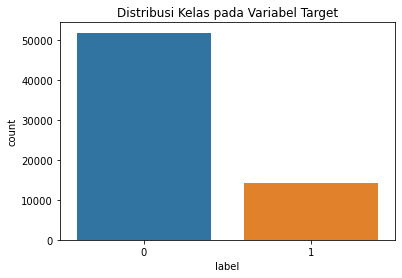

In [76]:
# Membuat bar plot untuk variabel target 'label'
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df1)
plt.title('Distribusi Kelas pada Variabel Target')
plt.show()

Before oversampling:
0    51801
1    14108
Name: label, dtype: int64
After oversampling:
1    51801
0    51801
Name: label, dtype: int64


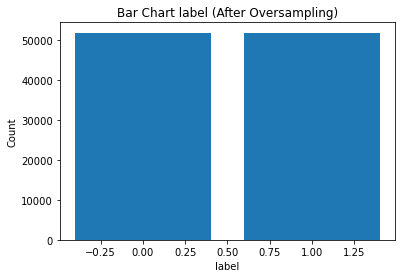

Updated DataFrame:
        attack_cat_Normal      sttl  attack_cat_Exploits  attack_cat_Fuzzers  \
0                0.900001  1.150919            -0.523279           -0.372094   
1                0.900001 -0.672178            -0.523279           -0.372094   
2                0.900001  1.150919            -0.523279           -0.372094   
3                0.900001  1.150919            -0.523279           -0.372094   
4                0.900001  1.150919            -0.523279           -0.372094   
...                   ...       ...                  ...                 ...   
103597           0.900001 -0.966533            -0.523279           -0.372094   
103598           0.900001 -0.966533            -0.523279           -0.372094   
103599           0.900001 -0.966533            -0.523279           -0.372094   
103600           0.900001 -0.966533            -0.523279           -0.372094   
103601           0.900001 -0.966533            -0.523279           -0.372094   

        ct_state_ttl

In [77]:
from imblearn.over_sampling import RandomOverSampler

# Count the number of data for each label category
counts_before = df1['label'].value_counts()
print('Before oversampling:')
print(counts_before)

# Perform oversampling
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(df1.drop(['label'], axis=1), df1['label'])

# Sum data after oversampling
resampled_counts = pd.Series(y_resampled).value_counts()
print('After oversampling:')
print(resampled_counts)

# Update df1 with oversampled data
df1_resampled = pd.concat([X_resampled, pd.Series(y_resampled, name='label')], axis=1)

# Create bar chart
labels = resampled_counts.index
values = resampled_counts.values
plt.bar(labels, values)

plt.title('Bar Chart label (After Oversampling)')
plt.xlabel('label')
plt.ylabel('Count')
plt.show()

# Display the updated DataFrame
print('Updated DataFrame:')
print(df1_resampled)

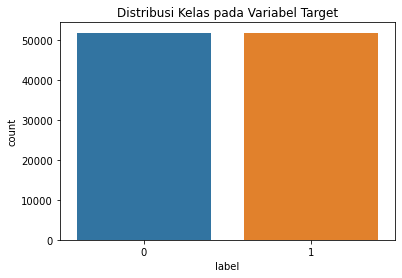

In [78]:
# Membuat bar plot untuk variabel target 'label'
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df1_resampled)
plt.title('Distribusi Kelas pada Variabel Target')
plt.show()

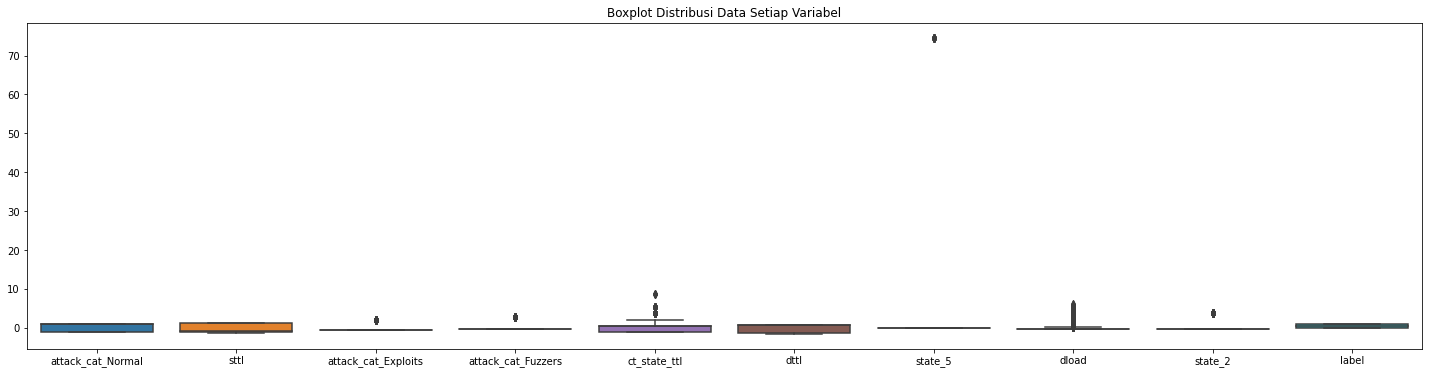

In [79]:
# Membuat boxplot menggunakan Seaborn
plt.figure(figsize=(25, 6))
sns.boxplot(data=df1_resampled)
plt.title('Boxplot Distribusi Data Setiap Variabel')
plt.show()

In [80]:
# Definisi kolom yang akan dihapus outlier
outlier_cols = ['attack_cat_Exploits', 'attack_cat_Normal', 'attack_cat_Fuzzers', 'ct_state_ttl', 'state_5', 'state_2']

# Menghapus outlier menggunakan metode IQR
for col in outlier_cols:
    Q1 = df1_resampled[col].quantile(0.25)
    Q3 = df1_resampled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df1_resampled = df1_resampled[(df1_resampled[col] >= lower_bound) & (df1[col] <= upper_bound)]

# Menghitung jumlah outlier pada kolom 'dload'
col_to_check_outliers = 'dload'
Q1_dload = df1_resampled[col_to_check_outliers].quantile(0.25)
Q3_dload = df1_resampled[col_to_check_outliers].quantile(0.75)
IQR_dload = Q3_dload - Q1_dload
lower_bound_dload = Q1_dload - 1.5 * IQR_dload
upper_bound_dload = Q3_dload + 1.5 * IQR_dload

outliers_dload = df1_resampled[(df1_resampled[col_to_check_outliers] < lower_bound_dload) | (df1[col_to_check_outliers] > upper_bound_dload)]

# Menampilkan DataFrame setelah menghapus outlier
print("DataFrame setelah menghapus outlier:")
print(df1_resampled)

# Menampilkan jumlah outlier pada kolom 'dload'
print("\nJumlah outlier pada kolom 'dload':", len(outliers_dload))

<ipython-input-80-30050678d163>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1_resampled = df1_resampled[(df1_resampled[col] >= lower_bound) & (df1[col] <= upper_bound)]
<ipython-input-80-30050678d163>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1_resampled = df1_resampled[(df1_resampled[col] >= lower_bound) & (df1[col] <= upper_bound)]
<ipython-input-80-30050678d163>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1_resampled = df1_resampled[(df1_resampled[col] >= lower_bound) & (df1[col] <= upper_bound)]
<ipython-input-80-30050678d163>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1_resampled = df1_resampled[(df1_resampled[col] >= lower_bound) & (df1[col] <= upper_bound)]
<ipython-input-80-30050678d163>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1_resampled = df1_resampled[(df1_resampled[col] 

DataFrame setelah menghapus outlier:
        attack_cat_Normal      sttl  attack_cat_Exploits  attack_cat_Fuzzers  \
8                0.900001 -0.672178            -0.523279           -0.372094   
29              -1.111110  1.150919            -0.523279            2.687493   
31              -1.111110 -0.672178             1.911025           -0.372094   
32              -1.111110 -0.672178             1.911025           -0.372094   
34              -1.111110  1.150919            -0.523279            2.687493   
...                   ...       ...                  ...                 ...   
103577           0.900001 -0.966533            -0.523279           -0.372094   
103580           0.900001 -0.966533            -0.523279           -0.372094   
103581           0.900001 -0.966533            -0.523279           -0.372094   
103591           0.900001 -0.966533            -0.523279           -0.372094   
103593           0.900001 -0.966533            -0.523279           -0.372094   

  

<ipython-input-80-30050678d163>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1_resampled = df1_resampled[(df1_resampled[col] >= lower_bound) & (df1[col] <= upper_bound)]
<ipython-input-80-30050678d163>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers_dload = df1_resampled[(df1_resampled[col_to_check_outliers] < lower_bound_dload) | (df1[col_to_check_outliers] > upper_bound_dload)]


In [81]:
# Menghitung nilai IQR, lower bound, dan upper bound untuk 'dload'
Q1_dload = df1_resampled['dload'].quantile(0.25)
Q3_dload = df1_resampled['dload'].quantile(0.75)
IQR_dload = Q3_dload - Q1_dload
lower_bound_dload = Q1_dload - 1.5 * IQR_dload
upper_bound_dload = Q3_dload + 1.5 * IQR_dload

# Menghapus outlier pada kolom 'dload'
df1_resampled = df1_resampled[(df1_resampled['dload'] >= lower_bound_dload) & (df1_resampled['dload'] <= upper_bound_dload)]

# Menampilkan DataFrame setelah menghapus outlier
print("DataFrame setelah menghapus outlier:")
print(df1_resampled)

DataFrame setelah menghapus outlier:
        attack_cat_Normal      sttl  attack_cat_Exploits  attack_cat_Fuzzers  \
8                0.900001 -0.672178            -0.523279           -0.372094   
29              -1.111110  1.150919            -0.523279            2.687493   
31              -1.111110 -0.672178             1.911025           -0.372094   
32              -1.111110 -0.672178             1.911025           -0.372094   
34              -1.111110  1.150919            -0.523279            2.687493   
...                   ...       ...                  ...                 ...   
103557           0.900001 -0.966533            -0.523279           -0.372094   
103569           0.900001 -0.966533            -0.523279           -0.372094   
103574           0.900001 -0.966533            -0.523279           -0.372094   
103591           0.900001 -0.966533            -0.523279           -0.372094   
103593           0.900001 -0.966533            -0.523279           -0.372094   

  

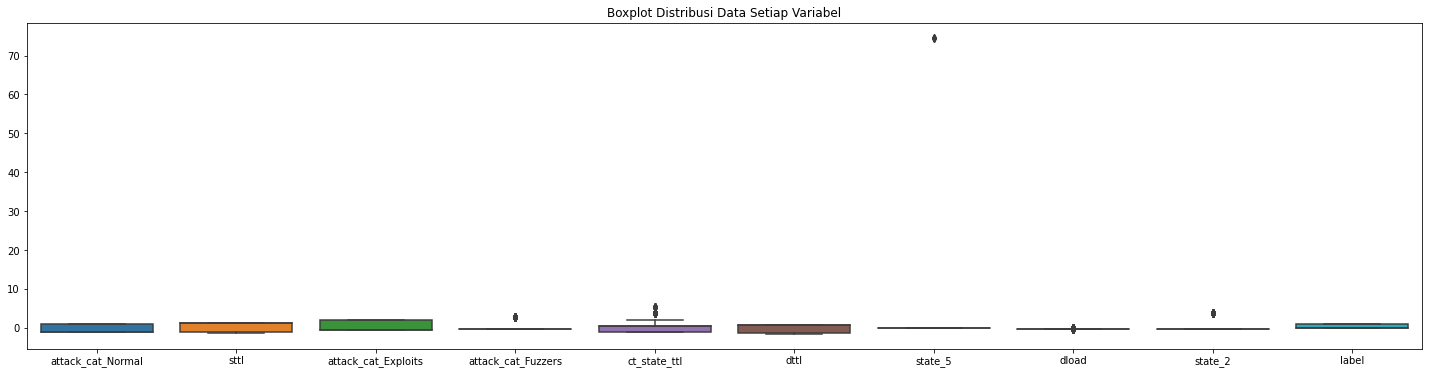

In [82]:
# Membuat boxplot menggunakan Seaborn
plt.figure(figsize=(25, 6))
sns.boxplot(data=df1_resampled)
plt.title('Boxplot Distribusi Data Setiap Variabel')
plt.show()

In [83]:
df1_resampled['label']

8         0
29        0
31        0
32        0
34        0
         ..
103557    1
103569    1
103574    1
103591    1
103593    1
Name: label, Length: 27161, dtype: int64

In [103]:
df1_resampled.dtypes

attack_cat_Normal      float64
sttl                   float64
attack_cat_Exploits    float64
attack_cat_Fuzzers     float64
ct_state_ttl           float64
dttl                   float64
state_5                float64
dload                  float64
state_2                float64
label                    int64
dtype: object

In [84]:
from sklearn.model_selection import train_test_split

# Periksa hasil dari df1.drop
features = df1_resampled.drop(['label'], axis=1)
print(features.head())

# Lanjutkan dengan pemisahan data
X = features
y = df1_resampled['label'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of train and test data
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

    attack_cat_Normal      sttl  attack_cat_Exploits  attack_cat_Fuzzers  \
8            0.900001 -0.672178            -0.523279           -0.372094   
29          -1.111110  1.150919            -0.523279            2.687493   
31          -1.111110 -0.672178             1.911025           -0.372094   
32          -1.111110 -0.672178             1.911025           -0.372094   
34          -1.111110  1.150919            -0.523279            2.687493   

    ct_state_ttl      dttl  state_5     dload   state_2  
8       0.505893  0.759979  -0.0134 -0.387342 -0.270126  
29      0.505893  0.759979  -0.0134 -0.386308 -0.270126  
31      0.505893  0.759979  -0.0134 -0.387066 -0.270126  
32      0.505893  0.759979  -0.0134 -0.384195 -0.270126  
34      0.505893  0.759979  -0.0134 -0.387676 -0.270126  
X_train shape: (19012, 9)
y_train shape: (19012,)
X_test shape: (8149, 9)
y_test shape: (8149,)


In [85]:
X

,attack_cat_Normal,sttl,attack_cat_Exploits,attack_cat_Fuzzers,ct_state_ttl,dttl,state_5,dload,state_2
8,0.900001,-0.672178,-0.523279,-0.372094,0.505893,0.759979,-0.0134,-0.387342,-0.270126
29,-1.111110,1.150919,-0.523279,2.687493,0.505893,0.759979,-0.0134,-0.386308,-0.270126
31,-1.111110,-0.672178,1.911025,-0.372094,0.505893,0.759979,-0.0134,-0.387066,-0.270126
32,-1.111110,-0.672178,1.911025,-0.372094,0.505893,0.759979,-0.0134,-0.384195,-0.270126
34,-1.111110,1.150919,-0.523279,2.687493,0.505893,0.759979,-0.0134,-0.387676,-0.270126
...,...,...,...,...,...,...,...,...,...
103557,0.900001,-0.966533,-0.523279,-0.372094,-1.117348,-1.317614,-0.0134,-0.283674,3.701971
103569,0.900001,-0.966533,-0.523279,-0.372094,-1.117348,-1.317614,-0.0134,-0.205214,3.701971
103574,0.900001,-0.966533,-0.523279,-0.372094,-1.117348,-1.317614,-0.0134,-0.260917,3.701971
103591,0.900001,-0.966533,-0.523279,-0.372094,-1.117348,-1.317614,-0.0134,-0.209818,3.701971


In [86]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# Contoh: Membuat model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Menggunakan model untuk membuat prediksi
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mencetak hasil evaluasi
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('\nClassification Report:')
print(class_report)

Accuracy: 0.8655
Precision: 0.7615
Recall: 0.8062
F1 Score: 0.7832

Confusion Matrix:
[[5073  620]
 [ 476 1980]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      5693
           1       0.76      0.81      0.78      2456

    accuracy                           0.87      8149
   macro avg       0.84      0.85      0.84      8149
weighted avg       0.87      0.87      0.87      8149



In [88]:
from sklearn.model_selection import GridSearchCV

# Inisialisasi model Random Forest Classifier
rf_model = RandomForestClassifier()

# Definisi grid parameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')

# Melatih model dengan grid search
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Parameter Terbaik Random Forest Classifier:")
print(grid_search.best_params_)

# Menampilkan akurasi terbaik
print("Akurasi Terbaik Random Forest Classifier:", grid_search.best_score_)

Parameter Terbaik Random Forest Classifier:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Akurasi Terbaik Random Forest Classifier: 0.8885439163544834



Confusion Matrix:
[[5402  291]
 [ 588 1868]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      5693
           1       0.87      0.76      0.81      2456

    accuracy                           0.89      8149
   macro avg       0.88      0.85      0.87      8149
weighted avg       0.89      0.89      0.89      8149

Accuracy: 0.8921
Precision: 0.8652
Recall: 0.7606
F1 Score: 0.8095


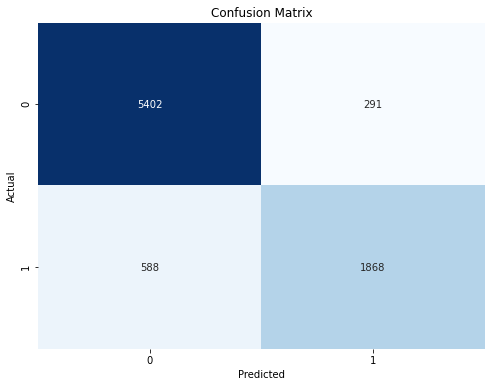

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Inisialisasi model Random Forest Classifier dengan parameter terbaik
rf_model_best = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=50
)

# Melatih model dengan data latih
rf_model_best.fit(X_train, y_train)

# Membuat prediksi menggunakan model
y_pred = rf_model_best.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('\nClassification Report:')
print(class_report)

# Menampilkan hasil evaluasi
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

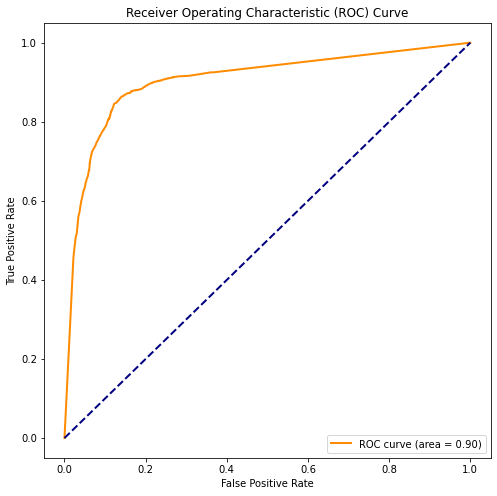

In [90]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Membuat dan melatih model RandomForest Classifier (sebagai contoh)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Menghitung nilai prediksi probabilitas untuk kelas positif
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Menghitung kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Menampilkan kurva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Confusion Matrix XGBoost:
[[5404  289]
 [ 601 1855]]

Classification Report XGBoost:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      5693
           1       0.87      0.76      0.81      2456

    accuracy                           0.89      8149
   macro avg       0.88      0.85      0.87      8149
weighted avg       0.89      0.89      0.89      8149

Accuracy XGBoost: 0.8908
Precision XGBoost: 0.8652
Recall XGBoost: 0.7553
F1 Score XGBoost: 0.8065


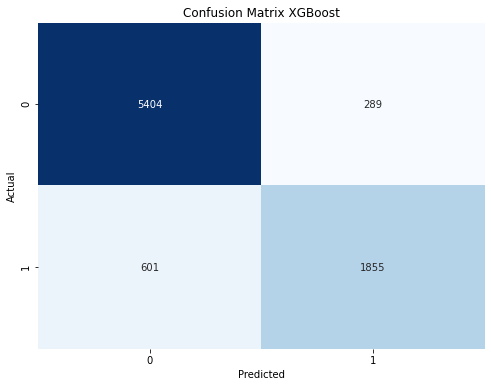

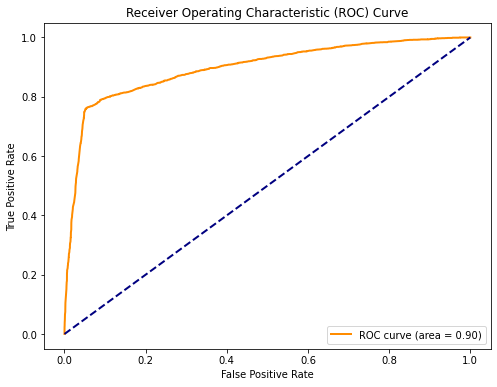

In [92]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Membuat dataset dan membaginya menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi model XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Melatih model
xgb_model.fit(X_train, y_train)

# Membuat prediksi
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi model XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print('\nConfusion Matrix XGBoost:')
print(conf_matrix_xgb)

# Classification Report
class_report_xgb = classification_report(y_test, y_pred_xgb)
print('\nClassification Report XGBoost:')
print(class_report_xgb)

# Menampilkan hasil evaluasi model XGBoost
print(f'Accuracy XGBoost: {accuracy_xgb:.4f}')
print(f'Precision XGBoost: {precision_xgb:.4f}')
print(f'Recall XGBoost: {recall_xgb:.4f}')
print(f'F1 Score XGBoost: {f1_xgb:.4f}')

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualisasi ROC Curve
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

[LightGBM] [Info] Number of positive: 5672, number of negative: 13340
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 289
[LightGBM] [Info] Number of data points in the train set: 19012, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.298338 -> initscore=-0.855225
[LightGBM] [Info] Start training from score -0.855225

Confusion Matrix LightGBM:
[[5408  285]
 [ 595 1861]]

Classification Report LightGBM:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      5693
           1       0.87      0.76      0.81      2456

    accuracy                           0.89      8149
   macro avg       0.88      0.85      0.87      8149
weighted avg       0.89      0.89      0.89      8149

Accuracy LightGBM: 0.8920
Prec

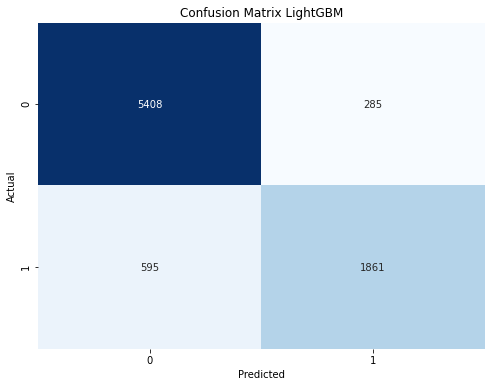

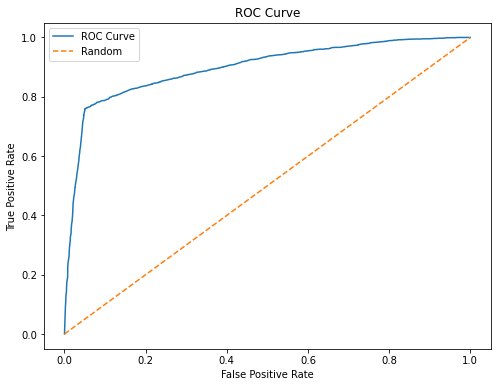


Area under ROC Curve: 0.8973


In [94]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat dataset dan membaginya menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi model LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)

# Melatih model
lgb_model.fit(X_train, y_train)

# Membuat prediksi
y_pred_lgb = lgb_model.predict(X_test)

# Evaluasi model LightGBM
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)

# Confusion Matrix
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
print('\nConfusion Matrix LightGBM:')
print(conf_matrix_lgb)

# Classification Report
class_report_lgb = classification_report(y_test, y_pred_lgb)
print('\nClassification Report LightGBM:')
print(class_report_lgb)

# Menampilkan hasil evaluasi model LightGBM
print(f'Accuracy LightGBM: {accuracy_lgb:.4f}')
print(f'Precision LightGBM: {precision_lgb:.4f}')
print(f'Recall LightGBM: {recall_lgb:.4f}')
print(f'F1 Score LightGBM: {f1_lgb:.4f}')

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix LightGBM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualisasi ROC Curve
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Area under ROC Curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'\nArea under ROC Curve: {roc_auc:.4f}')

Accuracy: 0.8920
Precision: 0.8669
Recall: 0.7581
F1 Score: 0.8089

Confusion Matrix:
[[5407  286]
 [ 594 1862]]


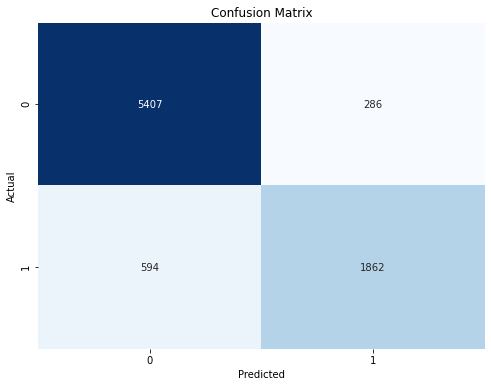


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      5693
           1       0.87      0.76      0.81      2456

    accuracy                           0.89      8149
   macro avg       0.88      0.85      0.87      8149
weighted avg       0.89      0.89      0.89      8149



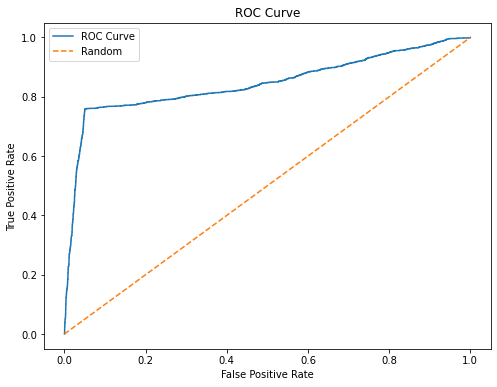


Area under ROC Curve: 0.8441


In [95]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Contoh: Membuat model SVC
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)

# Menggunakan model untuk membuat prediksi
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mencetak hasil evaluasi
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print('\nClassification Report:')
print(class_report)

# Visualisasi ROC Curve
y_pred_proba = model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Area under ROC Curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'\nArea under ROC Curve: {roc_auc:.4f}')

Accuracy: 0.8919
Precision: 0.8668
Recall: 0.7577
F1 Score: 0.8086

Confusion Matrix:
[[5407  286]
 [ 595 1861]]


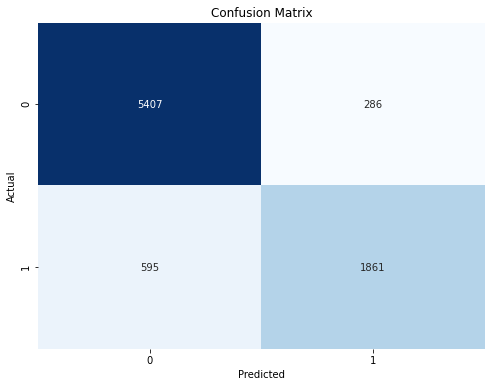


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      5693
           1       0.87      0.76      0.81      2456

    accuracy                           0.89      8149
   macro avg       0.88      0.85      0.87      8149
weighted avg       0.89      0.89      0.89      8149



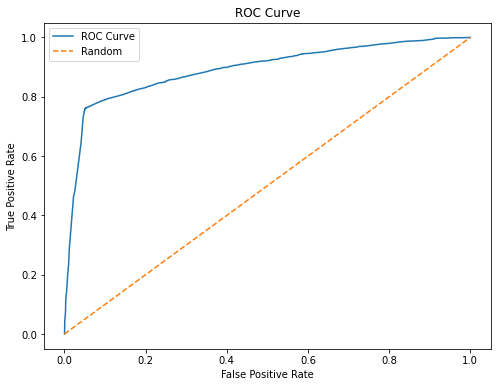


Area under ROC Curve: 0.8919


In [96]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Contoh: Membuat model Gradient Boosting Classifier
model_gdb = GradientBoostingClassifier(random_state=42)
model_gdb.fit(X_train, y_train)

# Menggunakan model untuk membuat prediksi
y_pred = model_gdb.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mencetak hasil evaluasi
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print('\nClassification Report:')
print(class_report)

# Visualisasi ROC Curve
y_pred_proba = model_gdb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Area under ROC Curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'\nArea under ROC Curve: {roc_auc:.4f}')


Results for Decision Tree Classifier:
Accuracy: 0.8637
Precision: 0.7582
Recall: 0.8042
F1 Score: 0.7805

Confusion Matrix for Decision Tree:
[[5063  630]
 [ 481 1975]]


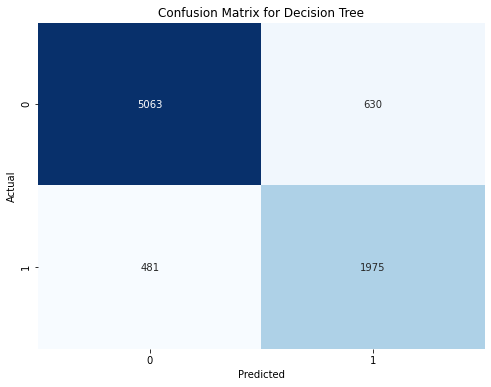


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      5693
           1       0.76      0.80      0.78      2456

    accuracy                           0.86      8149
   macro avg       0.84      0.85      0.84      8149
weighted avg       0.87      0.86      0.86      8149



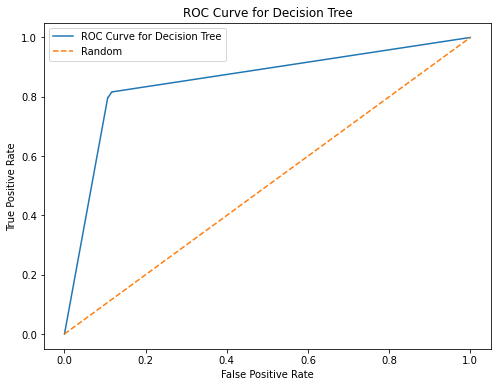


Area under ROC Curve for Decision Tree: 0.8528


In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Contoh: Membuat model (Decision Tree Classifier)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Menggunakan model untuk membuat prediksi
y_dt_pred = dt_model.predict(X_test)

# Menghitung metrik evaluasi untuk Decision Tree
dt_accuracy = accuracy_score(y_test, y_dt_pred)
dt_precision = precision_score(y_test, y_dt_pred)
dt_recall = recall_score(y_test, y_dt_pred)
dt_f1 = f1_score(y_test, y_dt_pred)

# Mencetak hasil evaluasi untuk Decision Tree
print('\nResults for Decision Tree Classifier:')
print(f'Accuracy: {dt_accuracy:.4f}')
print(f'Precision: {dt_precision:.4f}')
print(f'Recall: {dt_recall:.4f}')
print(f'F1 Score: {dt_f1:.4f}')

# Confusion Matrix untuk Decision Tree
dt_conf_matrix = confusion_matrix(y_test, y_dt_pred)
print('\nConfusion Matrix for Decision Tree:')
print(dt_conf_matrix)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report untuk Decision Tree
dt_class_report = classification_report(y_test, y_dt_pred)
print('\nClassification Report for Decision Tree:')
print(dt_class_report)

# Visualisasi ROC Curve untuk Decision Tree
y_dt_pred_proba = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_dt_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label='ROC Curve for Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.title('ROC Curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Area under ROC Curve untuk Decision Tree
roc_auc_dt = roc_auc_score(y_test, y_dt_pred_proba)
print(f'\nArea under ROC Curve for Decision Tree: {roc_auc_dt:.4f}')

Accuracy: 0.8886
Precision: 0.8550
Recall: 0.7590
F1 Score: 0.8041

Confusion Matrix:
[[5377  316]
 [ 592 1864]]


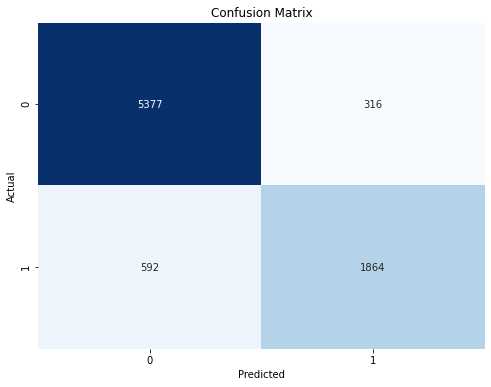


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      5693
           1       0.86      0.76      0.80      2456

    accuracy                           0.89      8149
   macro avg       0.88      0.85      0.86      8149
weighted avg       0.89      0.89      0.89      8149



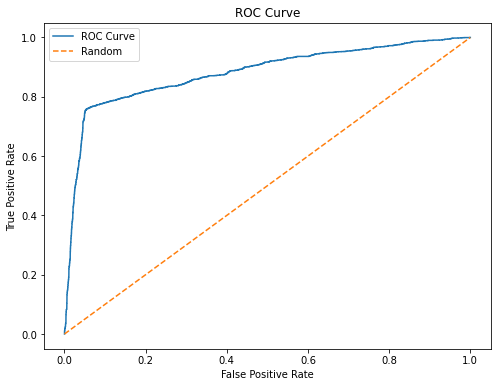


Area under ROC Curve: 0.8808


In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat dan melatih model Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Menggunakan model untuk membuat prediksi
y_pred = logistic_model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mencetak hasil evaluasi
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print('\nClassification Report:')
print(class_report)

# Visualisasi ROC Curve
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Area under ROC Curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'\nArea under ROC Curve: {roc_auc:.4f}')

Accuracy: 0.8599
Precision: 0.7651
Recall: 0.7720
F1 Score: 0.7685

Confusion Matrix:
[[5111  582]
 [ 560 1896]]


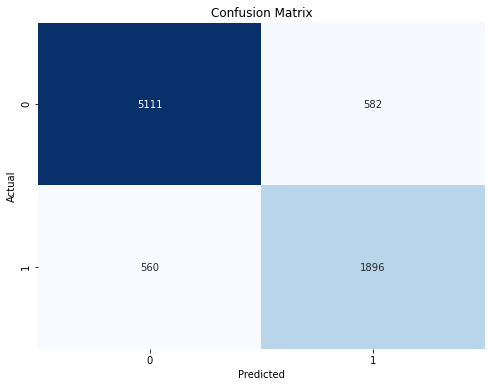


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5693
           1       0.77      0.77      0.77      2456

    accuracy                           0.86      8149
   macro avg       0.83      0.83      0.83      8149
weighted avg       0.86      0.86      0.86      8149



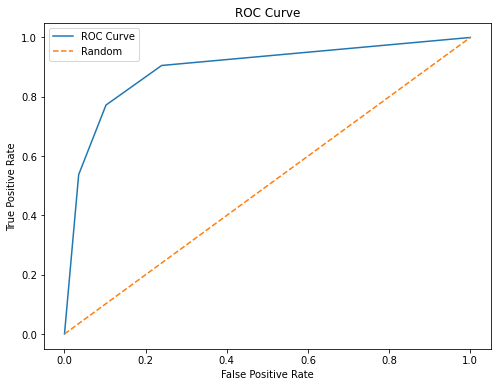


Area under ROC Curve: 0.8932


In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat dan melatih model KNN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Menentukan jumlah tetangga (neighbors)
knn_model.fit(X_train, y_train)

# Menggunakan model untuk membuat prediksi
y_pred = knn_model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mencetak hasil evaluasi
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print('\nClassification Report:')
print(class_report)

# Visualisasi ROC Curve
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Area under ROC Curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'\nArea under ROC Curve: {roc_auc:.4f}')

Accuracy: 0.8697
Precision: 0.7931
Recall: 0.7679
F1 Score: 0.7803

Confusion Matrix:
[[5201  492]
 [ 570 1886]]


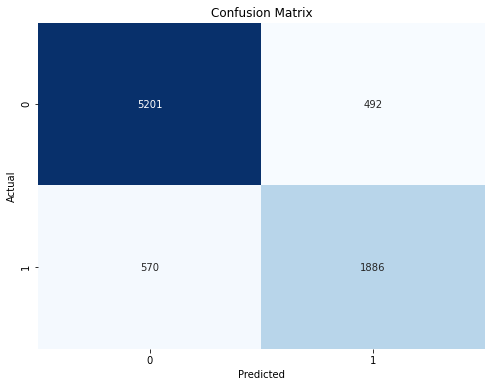


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      5693
           1       0.79      0.77      0.78      2456

    accuracy                           0.87      8149
   macro avg       0.85      0.84      0.84      8149
weighted avg       0.87      0.87      0.87      8149



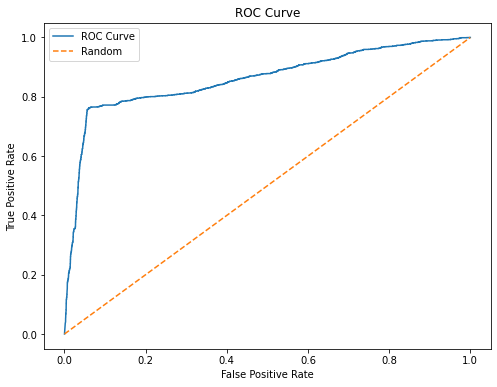


Area under ROC Curve: 0.8603


In [100]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat dan melatih model Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Menggunakan model untuk membuat prediksi
y_pred = nb_model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mencetak hasil evaluasi
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print('\nClassification Report:')
print(class_report)

# Visualisasi ROC Curve
y_pred_proba = nb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Area under ROC Curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'\nArea under ROC Curve: {roc_auc:.4f}')

In [101]:
import pickle

# Simpan model ke file
pickle.dump(model_gdb, open('model_gdb.pkl', 'wb'))